In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 7

## Momersion Test
Read some real AAPL minute data

In [2]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=0B9-kA56h5JCMbXptY0kyVXZXaUU',
                 index_col=0, parse_dates=True)

Estimate the Momersion indicator

In [3]:
close = np.round(data.CLOSE, 2)
diff = close.diff(1)
diff_multiplied = diff * diff.shift()

df = pd.DataFrame(np.transpose(np.vstack((close, diff, diff_multiplied))),
                  index=data.index,
                  columns=['Close', 'diff', 'diff_multiplied'])

df.ix[df.diff_multiplied > 0 , 'Mc'] = 1
df.ix[df.diff_multiplied < 0 , 'MRc'] = 1
df.fillna(value=0, inplace=True)
momersion_period = 10
df["momersion"] = (100.0 * pd.rolling_sum(df.Mc, momersion_period) /
                  (pd.rolling_sum(df.Mc, momersion_period) + pd.rolling_sum(df.MRc, momersion_period)))

Plot the results

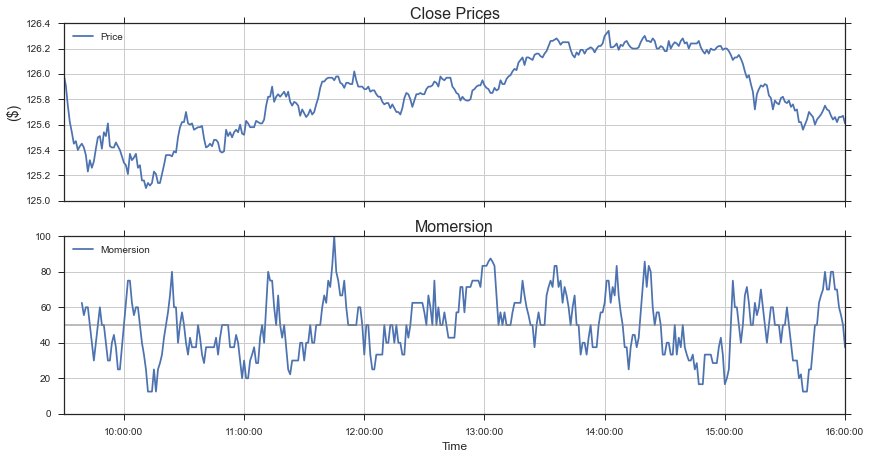

In [4]:
fig, ax = plt.subplots(2, sharex=True)
time = df.index

ax[0].set_title('Close Prices', fontsize=16)
ax[0].plot(time, df.Close, label='Price')
ax[0].set_ylabel('($)', fontsize=14)
ax[0].legend(loc='upper left')
ax[0].grid()

# The second subplot are the indicator and the trigger.
ax[1].set_title('Momersion', fontsize=16)
ax[1].plot(time, df.momersion , label='Momersion')
ax[1].axhline(y=50, color='grey', alpha=0.6)
#ax[1].axhline(y=30, color='red', alpha=0.6)
ax[1].set_ylim(ymin=0, ymax = 100)
ax[1].set_xlabel('Time', fontsize=12)
ax[1].legend(loc='upper left')
ax[1].grid()

Here are the results used in the Momersion Unit test for the **OnlyFullPeriodTest()**

In [5]:
np.round(df.momersion.head(30).fillna(value=50).as_matrix(), 2)

array([ 50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,
        50.  ,  62.5 ,  55.56,  60.  ,  60.  ,  50.  ,  40.  ,  30.  ,
        40.  ,  50.  ,  60.  ,  50.  ,  50.  ,  40.  ,  30.  ,  30.  ,
        40.  ,  44.44,  37.5 ,  25.  ,  25.  ,  37.5 ])

The result for the **MinPeriodTest()** were estimated with excel and are available [here](http://tinyurl.com/pftpaej)